# Trabalho de conclusão de curso - Data Science com ênfase em Machine Learning
## Alunos: Douglas Tadeu Sabatini & Jari Fernandes Nogueira Neto


### FIB Bauru - 06/2020

### Preparação dos recortes.
- Nesta etapa, faremos o tratamento e padronização das imagens dos caracteres que foram recortadas dos veículos.

In [0]:
# Importando bibliotecas que serão utilizadas.
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import os

from PIL import Image

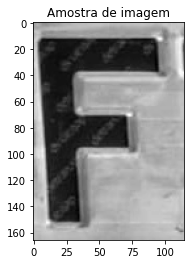

In [5]:
img= cv2.imread('/home/jarineto/Documentos/MBA_FIB/TCC/Images/Recortes/placas/FDJ5185_1_F.jpeg', 0)
plt.imshow(img, 'gray')
plt.title('Amostra de imagem')
plt.show()

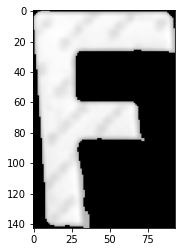

In [6]:
# Tratando imagem, localizando contornos e isolando o caractere de eventuais ruídos.
neg = cv2.bitwise_not(img)
blur = cv2.GaussianBlur(neg,(5,5),2)
ret3,th1 = cv2.threshold(blur,0,255,cv2.THRESH_TOZERO + cv2.THRESH_OTSU)


cnts, new  = cv2.findContours(th1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnts_sorted = sorted(cnts, key = cv2.contourArea, reverse = True)
idx = 0 # Índice para selecionar o contorno de maior área.
mask = np.zeros_like(th1) # Criando máscara.
cv2.drawContours(mask, cnts_sorted, idx, 255, -1) # Preenchendo máscara com o contorno.

out = np.zeros_like(th1) # Extraindo objeto para o output.
out[mask == 255] = th1[mask == 255]

# Recortando contorno procurado.
(y, x) = np.where(mask == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = out[topy:bottomy+1, topx:bottomx+1]


# Exibindo imagem isolada.
plt.imshow(out, 'gray')
plt.show()

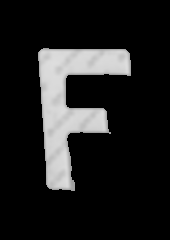

In [9]:
# Processo para isolar a imagem recortada ao centro, padronizando o tamanho.
temp = cv2.cvtColor(out,cv2.COLOR_GRAY2RGB) # Necessário os 3 canais para interpretação pela biblioteca Image.

imgx = Image.fromarray(temp, 'RGB')

width, height = imgx.size   # Captura dimensões originais.
new_width = 170
new_height = 240

# Definindo novos pontos espaciais.
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Ajustando imagem ao centro.
final_img = imgx.crop((left, top, right, bottom))
final_img

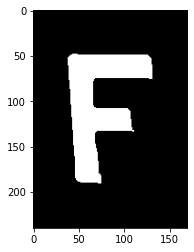

In [8]:
# Retornando imagem para array.
im_np = np.array(final_img)
im_np2 = cv2.cvtColor(im_np, cv2.COLOR_BGR2GRAY)

# Binarizando imagem.
_, bin1 = cv2.threshold(im_np2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Aplicando o processo de dilatação, seguido pelo processo de erosão, para corrigir falhas no caractere.
kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(bin1, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, 'gray')
plt.show()